# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [1]:
!python --version

Python 3.9.16


In [2]:
import torch
print(torch.__version__)

2.0.0+cu118


In [3]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-e3nhtzt4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-e3nhtzt4
  Resolved https://github.com/facebookresearch/detectron2.git to commit ecb786ccd26de4086a6fede437e7d728199470e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

# Get a predictor

In [4]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# We suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Create a configuration and a predictor
def get_predictor(config_file, checkpoint_url, score_thresh_test=0.5):
  # create a configuration object
  cfg = get_cfg()
  # get the configurations from the config_file
  config_file = model_zoo.get_config_file(config_file)
  cfg.merge_from_file(config_file)
  # get the pre-built weights of a trained model from the checkpoint
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
  # set the threshold for recall vs. precision at test time
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
  # create a predictor
  predictor = DefaultPredictor(cfg)
  return cfg, predictor

# Perform inference

In [9]:
import cv2
from google.colab.patches import cv2_imshow
def perform_inference(predictor, input_url):
  img = cv2.imread(input_url)
  output = predictor(img)
  return img, output

# Visualization

In [10]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
# computer vision tasks
OBJECT_DETECTION = 0
INSTANCE_SEGMENTATION = 1
KEYPOINT_DETECTION = 2
SEMANTIC_SEGMENTATION = 3
PANOPTIC_SEGMENTATION = 4

def visualize_output(img, output, cfg, task=OBJECT_DETECTION, scale=1.0):
  v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=scale)
  if task == PANOPTIC_SEGMENTATION:
    panoptic_seg, segments_info = output["panoptic_seg"]
    annotated_img = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
  elif task == SEMANTIC_SEGMENTATION:
    sem_seg = output["sem_seg"].argmax(dim=0)
    annotated_img = v.draw_sem_seg(sem_seg.to("cpu"))
  else:
    annotated_img = v.draw_instance_predictions(output["instances"].to("cpu"))
  cv2_imshow(annotated_img.get_image()[:, :, ::-1])

In [11]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

--2023-04-24 02:28:08--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107917 (105K) [image/jpeg]
Saving to: ‘input.jpg.1’

input.jpg.1         100%[===================>] 105.39K  --.-KB/s    in 0.007s  

2023-04-24 02:28:08 (15.1 MB/s) - ‘input.jpg.1’ saved [107917/107917]



# Object detection

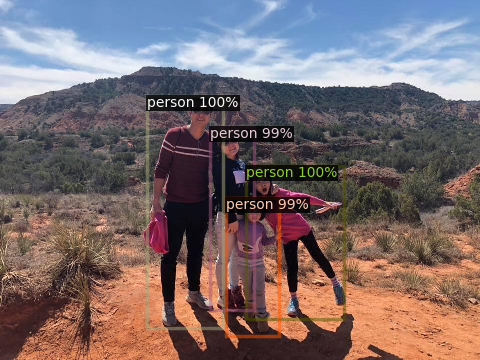

In [12]:
config_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "input.jpg"
task = OBJECT_DETECTION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

# Instance segmentation

model_final_a3ec72.pkl: 254MB [00:01, 184MB/s]                           


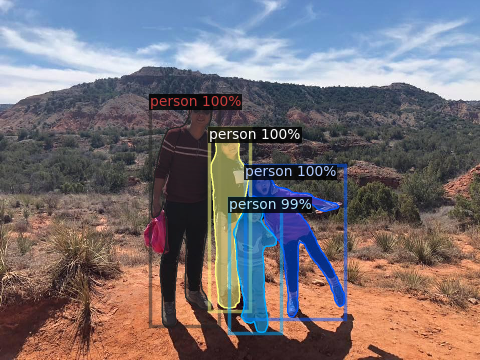

In [13]:
config_file = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "input.jpg"
task = INSTANCE_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

# Key-point detection

model_final_997cc7.pkl: 313MB [00:01, 161MB/s]                           


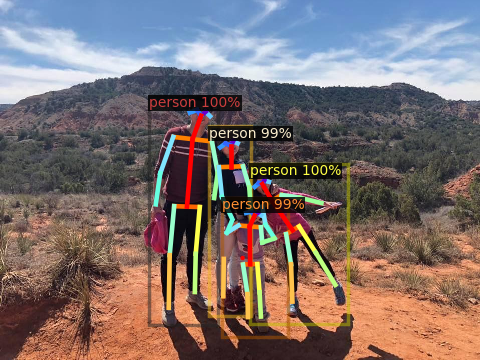

In [14]:
config_file = "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"
checkpoint_url = "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "input.jpg"
task = KEYPOINT_DETECTION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

# Semantic Segmentation

model_final_cafdb1.pkl: 261MB [00:01, 253MB/s]                           


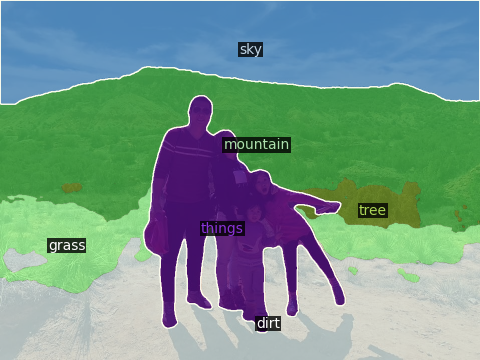

In [15]:
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
score_thresh_test = 0.95
input_url = "input.jpg"
task = SEMANTIC_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

# Panoptic Segmentation

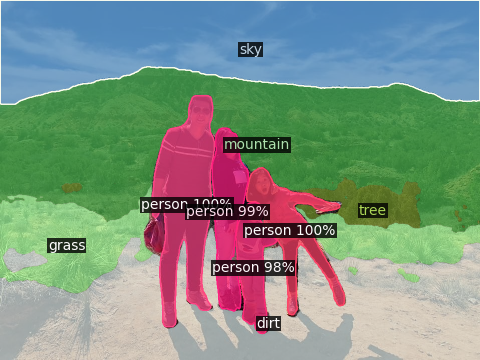

In [16]:
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
score_thresh_test = 0.95
input_url = "input.jpg"
task = PANOPTIC_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)